## **Analysis of Delays, Cancellations, and Detour**

# **1. Importing needed libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
# Without colab
# file_path = "/cleaned csv/Airport cleaned data.csv"
# df = pd.read_csv(file_path)

In [5]:
# Using colab
file_path = "/content/drive/MyDrive/cleaned csv/Airport cleaned data.csv"
df = pd.read_csv(file_path)

In [6]:
df['PROGRAMMED_DEPARTING_TIME_UTC'] = pd.to_datetime(df['PROGRAMMED_DEPARTING_TIME_UTC'])
df['ACTUAL_DEPARTING_TIME_UTC'] = pd.to_datetime(df['ACTUAL_DEPARTING_TIME_UTC'])
df['PROGRAMMED_ARRIVING_TIME_UTC'] = pd.to_datetime(df['PROGRAMMED_ARRIVING_TIME_UTC'])
df['ACTUAL_ARRIVING_TIME_UTC'] = pd.to_datetime(df['ACTUAL_ARRIVING_TIME_UTC'])

In [7]:
df

,CODE_CARRIER,ID_CARRIER,TAIL_NUM,FLIGHT_NUMBER,ORIGIN_AIRPORT_ID,ORIGIN_IATA,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_IATA,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,PROGRAMMED_TOTAL_FLIGHT_TIME,ACTUAL_TOTAL_FLIGHT_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PROGRAMMED_DEPARTING_TIME_UTC,ACTUAL_DEPARTING_TIME_UTC,PROGRAMMED_ARRIVING_TIME_UTC,ACTUAL_ARRIVING_TIME_UTC
0,9E,20363,N131EV,4838.0,14122,PIT,"Pittsburgh, PA",PA,Pennsylvania,12478,JFK,"New York, NY",NY,New York,-4.0,-25.0,0.0,NaN,0.0,123.0,102.0,70.0,1.0,340.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 22:12:00+00:00,2024-07-01 22:08:00+00:00,2024-07-02 00:15:00+00:00,2024-07-01 23:50:00+00:00
1,9E,20363,N131EV,5011.0,11433,DTW,"Detroit, MI",MI,Michigan,13244,MEM,"Memphis, TN",TN,Tennessee,-6.0,-7.0,0.0,NaN,0.0,118.0,117.0,85.0,1.0,610.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 12:25:00+00:00,2024-07-01 12:19:00+00:00,2024-07-01 14:23:00+00:00,2024-07-01 14:16:00+00:00
2,9E,20363,N131EV,5011.0,13244,MEM,"Memphis, TN",TN,Tennessee,11433,DTW,"Detroit, MI",MI,Michigan,-3.0,-12.0,0.0,NaN,0.0,117.0,108.0,85.0,1.0,610.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 17:00:00+00:00,2024-07-01 16:57:00+00:00,2024-07-01 18:57:00+00:00,2024-07-01 18:45:00+00:00
3,9E,20363,N131EV,5034.0,11433,DTW,"Detroit, MI",MI,Michigan,14122,PIT,"Pittsburgh, PA",PA,Pennsylvania,3.0,1.0,0.0,NaN,0.0,71.0,69.0,39.0,1.0,201.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 20:21:00+00:00,2024-07-01 20:24:00+00:00,2024-07-01 21:32:00+00:00,2024-07-01 21:33:00+00:00
4,9E,20363,N131EV,5423.0,12478,JFK,"New York, NY",NY,New York,10821,BWI,"Baltimore, MD",MD,Maryland,0.0,-21.0,0.0,NaN,0.0,92.0,71.0,45.0,1.0,184.0,NaN,NaN,NaN,NaN,NaN,2024-07-02 01:10:00+00:00,2024-07-02 01:10:00+00:00,2024-07-02 02:42:00+00:00,2024-07-02 02:21:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247823,YX,20452,N882RW,5836.0,10154,ACK,"Nantucket, MA",MA,Massachusetts,12478,JFK,"New York, NY",NY,New York,-4.0,34.0,0.0,NaN,0.0,78.0,116.0,41.0,1.0,199.0,0.0,0.0,34.0,0.0,0.0,2024-08-31 18:50:00+00:00,2024-08-31 18:46:00+00:00,2024-08-31 20:08:00+00:00,2024-08-31 20:42:00+00:00
1247824,YX,20452,N882RW,5836.0,12478,JFK,"New York, NY",NY,New York,10154,ACK,"Nantucket, MA",MA,Massachusetts,-10.0,-26.0,0.0,NaN,0.0,79.0,63.0,36.0,1.0,199.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 16:50:00+00:00,2024-08-31 16:40:00+00:00,2024-08-31 18:09:00+00:00,2024-08-31 17:43:00+00:00
1247825,YX,20452,N882RW,5848.0,14524,RIC,"Richmond, VA",VA,Virginia,12478,JFK,"New York, NY",NY,New York,-7.0,-3.0,0.0,NaN,0.0,85.0,89.0,57.0,1.0,288.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 14:00:00+00:00,2024-08-31 13:53:00+00:00,2024-08-31 15:25:00+00:00,2024-08-31 15:22:00+00:00
1247826,YX,20452,N979RP,3482.0,11618,EWR,"Newark, NJ",NJ,New Jersey,11986,GRR,"Grand Rapids, MI",MI,Michigan,-4.0,-24.0,0.0,NaN,0.0,134.0,114.0,87.0,1.0,605.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 13:44:00+00:00,2024-08-31 13:40:00+00:00,2024-08-31 15:58:00+00:00,2024-08-31 15:34:00+00:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247828 entries, 0 to 1247827
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype              
---  ------                         --------------    -----              
 0   CODE_CARRIER                   1247828 non-null  object             
 1   ID_CARRIER                     1247828 non-null  int64              
 2   TAIL_NUM                       1247828 non-null  object             
 3   FLIGHT_NUMBER                  1247828 non-null  float64            
 4   ORIGIN_AIRPORT_ID              1247828 non-null  int64              
 5   ORIGIN_IATA                    1247828 non-null  object             
 6   ORIGIN_CITY_NAME               1247828 non-null  object             
 7   ORIGIN_STATE_ABR               1247828 non-null  object             
 8   ORIGIN_STATE_NM                1247828 non-null  object             
 9   DEST_AIRPORT_ID                1247828 non-null  int64              

In [9]:
df.describe()

,ID_CARRIER,FLIGHT_NUMBER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,PROGRAMMED_TOTAL_FLIGHT_TIME,ACTUAL_TOTAL_FLIGHT_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1.247828e+06,1.247828e+06,1.247828e+06,1.247828e+06,1.223697e+06,1.218240e+06,1.247828e+06,1.247828e+06,1.247828e+06,1.218240e+06,1.218240e+06,1247828.0,1.247828e+06,323675.000000,323675.000000,323675.000000,323675.000000,323675.000000
mean,1.995278e+04,2.523870e+03,1.264161e+04,1.264177e+04,1.885772e+01,1.436964e+01,2.025680e-02,3.454803e-03,1.458751e+02,1.414707e+02,1.145884e+02,1.0,8.394919e+02,27.635366,4.009534,13.945257,0.109514,32.345544
std,3.702689e+02,1.650530e+03,1.536776e+03,1.536885e+03,6.538870e+01,6.710717e+01,1.408775e-01,5.867598e-02,7.218226e+01,7.257194e+01,7.022463e+01,0.0,6.051925e+02,79.623662,29.534719,34.412011,2.400925,66.518617
min,1.939300e+04,1.000000e+00,1.013500e+04,1.013500e+04,-5.000000e+01,-8.400000e+01,0.000000e+00,0.000000e+00,2.300000e+01,1.500000e+01,5.000000e+00,1.0,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.155000e+03,1.129200e+04,1.129200e+04,-5.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,9.300000e+01,8.800000e+01,6.300000e+01,1.0,3.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.269000e+03,1.288900e+04,1.288900e+04,-1.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,1.290000e+02,1.250000e+02,9.700000e+01,1.0,6.790000e+02,4.000000,0.000000,0.000000,0.000000,8.000000
75%,2.036300e+04,3.769000e+03,1.405700e+04,1.405700e+04,1.600000e+01,1.700000e+01,0.000000e+00,0.000000e+00,1.750000e+02,1.720000e+02,1.440000e+02,1.0,1.069000e+03,23.000000,0.000000,17.000000,0.000000,39.000000
max,2.045200e+04,8.819000e+03,1.686900e+04,1.686900e+04,3.777000e+03,3.803000e+03,1.000000e+00,1.000000e+00,1.326000e+03,7.150000e+02,6.620000e+02,1.0,5.095000e+03,3689.000000,1439.000000,1386.000000,512.000000,2305.000000


# **2. General analysis of the 3 types of flights**

Flights are categorized as follows:

1. Arrived at destination.
2. Diverted to other destinations.
3. Cancelled.




In [10]:
# Flight arrived at the destination
voli_non_cancellati_non_deviati = df.loc[(df['CANCELLED'] == 0) & (df["DIVERTED"] == 0)]

# Cancelled flights
voli_cancellati = df.loc[df['CANCELLED'] == 1]

# Detoured flights
voli_non_cancellati_deviati = df.loc[(df['CANCELLED'] == 0) & (df["DIVERTED"] == 1)]

### **Flights arrived at destination**

Number of flights which are arrived at the destination.

In [11]:
# Numbers of flight arrived at the destination
voli_arrivati_a_destinazione = len(voli_non_cancellati_non_deviati)

# Percentage of flight arrived at the destination
voli_arrivati_a_destinazione_perc = voli_arrivati_a_destinazione / (len(df)) * 100

print(f"Sono arrivati a destinazione: {voli_arrivati_a_destinazione} voli, ovvero il {voli_arrivati_a_destinazione_perc:.2f}% di tutti i voli")

Sono arrivati a destinazione: 1218240 voli, ovvero il 97.63% di tutti i voli


### **Flights diverted into other destinations**

NUmbers of flights diverted into other destinations.

In [12]:
voli_dirottati = len(voli_non_cancellati_deviati)
voli_dirottati_perc = voli_dirottati / (len(df)) * 100

print(f"Sono stati dirottati: {voli_dirottati} voli, ovvero il {voli_dirottati_perc:.2f}% di tutti i voli")

Sono stati dirottati: 4311 voli, ovvero il 0.35% di tutti i voli


### **Cancelled flights**

Number of flights cancelled.

In [13]:
voli_cancellati_len = len(voli_cancellati)
voli_cancellati_len_perc = voli_cancellati_len / (len(df)) * 100

print(f"Sono stati cancellati: {voli_cancellati_len} voli, ovvero il {voli_cancellati_len_perc:.2f}% di tutti i voli")

Sono stati cancellati: 25277 voli, ovvero il 2.03% di tutti i voli


### **Bar plot of the three categories**

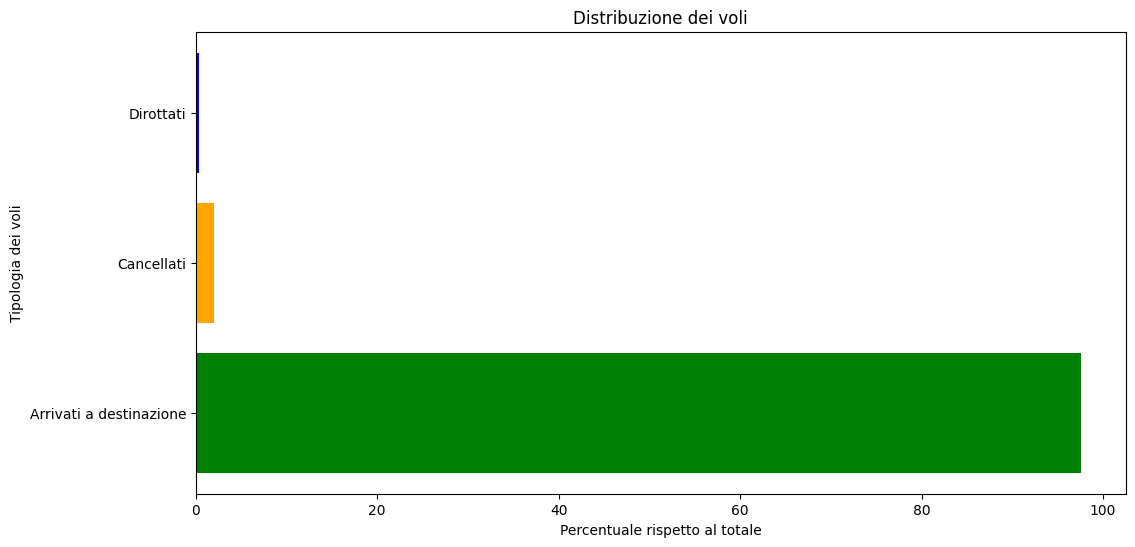

In [14]:
# Creation of bar plot

# Bar plot labels, size and color
labels = ['Arrivati a destinazione', 'Cancellati', 'Dirottati']
sizes = [voli_arrivati_a_destinazione_perc, voli_cancellati_len_perc, voli_dirottati_perc]
colors = ['green', 'orange', 'blue']

# Figure sizes
plt.figure(figsize=(12, 6))

# Creation of the bar plot
plt.barh(labels, sizes, color=colors)

# Add label and title
plt.title('Distribuzione dei voli')
plt.xlabel('Percentuale rispetto al totale')
plt.ylabel('Tipologia dei voli')

# Show graph
plt.show()


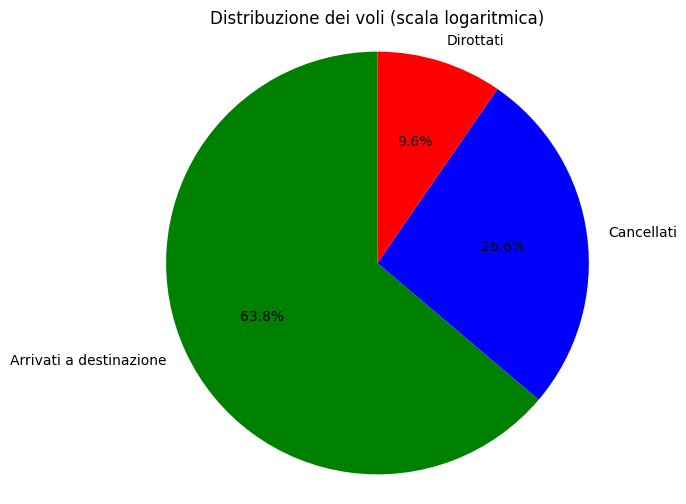

In [15]:
# Logaritmic scales
sizes_log = np.log(sizes)

# Plot a pie chart
plt.figure(figsize=(6, 6))

# Normalization of all the values which is needed to visualize small values
# Adding 1 to not have log(0) which is impossibile to calculate
sizes_log = sizes_log - min(sizes_log) + 1

plt.pie(sizes_log, labels=labels, colors=['green', 'blue', 'red'],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione dei voli (scala logaritmica)')
plt.axis('equal')
plt.show()

# **3. Analysis of delayed flight**

In [16]:
# Delayed flight
voli_arrivati_in_ritardo = df[(df['ARR_DELAY'] > 0) & (df['DIVERTED'] == 0) & (df['CANCELLED'] == 0)]

In [17]:
# Numbers of delayed flights
print(f"Numero di voli in ritardo: {len(voli_arrivati_in_ritardo)}")
print(f"Percentuale dei voli in ritardo: {len(voli_arrivati_in_ritardo) / len(df) * 100:.2f}%")

Numero di voli in ritardo: 514121
Percentuale dei voli in ritardo: 41.20%


**1. Descriptive analysis of delay**

In [18]:
# Mean
ritardo_medio = voli_arrivati_in_ritardo['ARR_DELAY'].mean()
# Std dev
ritardo_deviazione_standard = voli_arrivati_in_ritardo['ARR_DELAY'].std()
# Median
ritardo_mediana = voli_arrivati_in_ritardo['ARR_DELAY'].median()


print(f"Ritardo medio: {ritardo_medio:.0f} minuti")
print(f"Deviazione standard del ritardo: {ritardo_deviazione_standard:.0f} minuti")
print(f"Ritardo mediano: {ritardo_mediana:.0f} minuti")

Ritardo medio: 52 minuti
Deviazione standard del ritardo: 90 minuti
Ritardo mediano: 24 minuti


**2. Histogram plot of the delays in logarithmic scale**

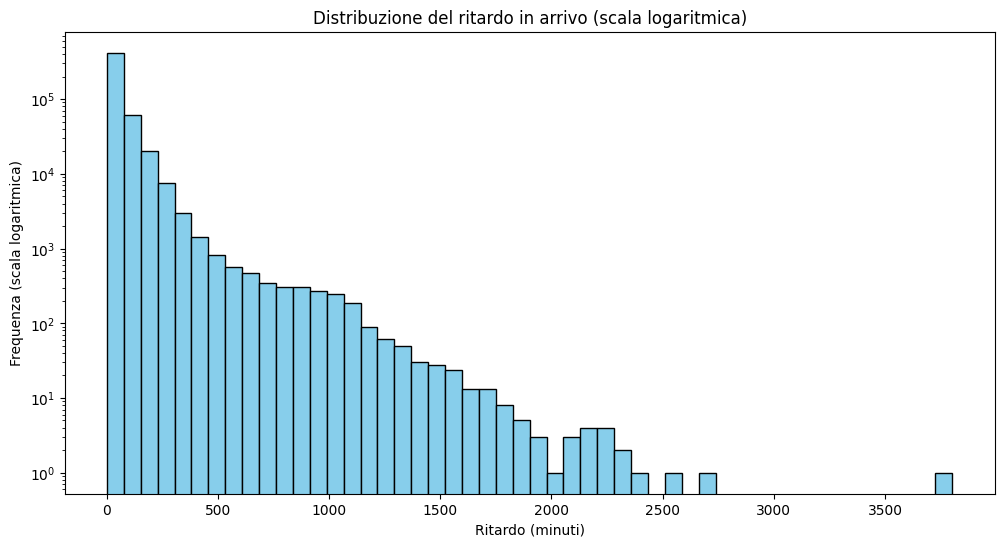

In [19]:
# Histo plot
plt.figure(figsize=(12, 6))

plt.hist(voli_arrivati_in_ritardo['ARR_DELAY'], bins=50, color='skyblue', edgecolor='black')

# Log scale
plt.yscale('log')

plt.title('Distribuzione del ritardo in arrivo (scala logaritmica)')
plt.xlabel('Ritardo (minuti)')
plt.ylabel('Frequenza (scala logaritmica)')

plt.show()

**3. Rleations between departure delay and arriving delay**

THe line plot shows an almost perfect linear correlation between delayed departure and delayed arriving between 2 airports.

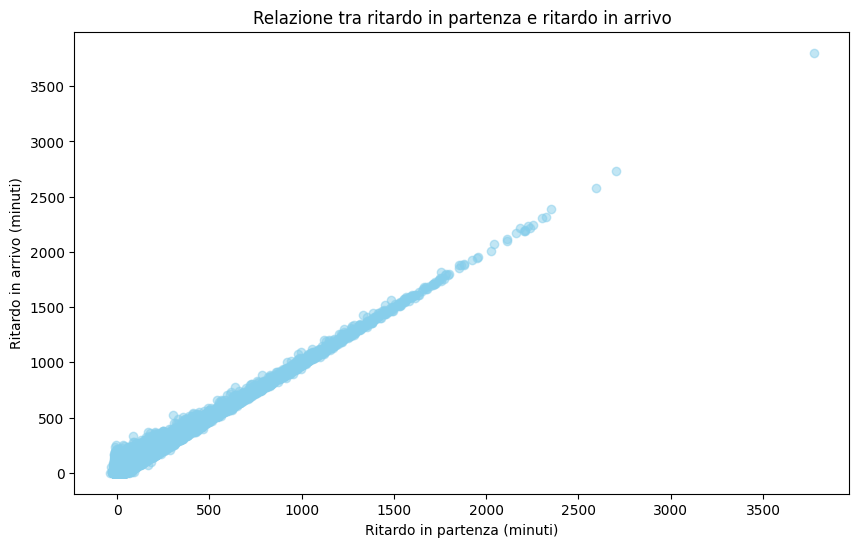

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(voli_arrivati_in_ritardo['DEP_DELAY'], voli_arrivati_in_ritardo['ARR_DELAY'], alpha=0.5, color='skyblue')
plt.title('Relazione tra ritardo in partenza e ritardo in arrivo')
plt.xlabel('Ritardo in partenza (minuti)')
plt.ylabel('Ritardo in arrivo (minuti)')
plt.show()


**Pearson correlation and p-value**

1. **Pearson's correlation coefficient (r)** measures the strength and direction of the linear relationship between two variables. A value close to +1 indicates a strong positive linear correlation, while a value close to -1 indicates a strong negative linear correlation. A value close to 0 indicates a weak or no linear correlation.

2. **The p-value**, on the other hand, indicates the statistical significance of the observed correlation. A low p-value (typically less than 0.05) suggests that the observed correlation is unlikely to be due to chance and is therefore statistically significant.

In [21]:
import scipy.stats as stats

# Pearson and p-value
pearson_corr, p_value = stats.pearsonr(voli_arrivati_in_ritardo['DEP_DELAY'], voli_arrivati_in_ritardo['ARR_DELAY'])

# Results
print(f"Indice di correlazione di Pearson: {pearson_corr:.2f}")
print(f"P-value: {p_value:.2f}")

Indice di correlazione di Pearson: 0.98
P-value: 0.00


**Heatmap**

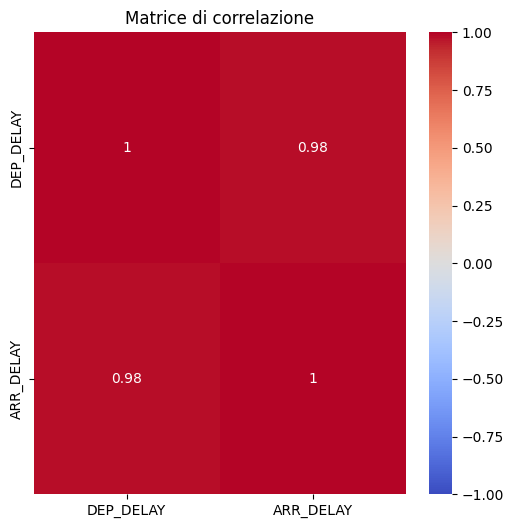

In [22]:
corr_matrix = voli_arrivati_in_ritardo[['DEP_DELAY', 'ARR_DELAY']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()

# **4. Delays reasons**

**Histo plot by Delays reasons**

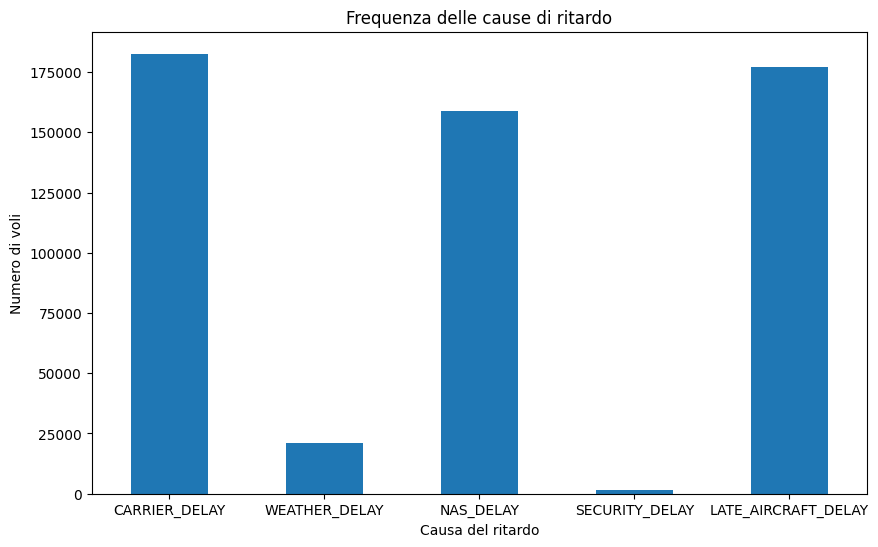

In [23]:
# For each category of each row, count the numbers of delayes reasons and sum the results
delay_counts = df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].gt(0).sum()

# Bar plot
delay_counts.plot(kind='bar', figsize=(10, 6), title='Frequenza delle cause di ritardo')
plt.xlabel('Causa del ritardo')
plt.ylabel('Numero di voli')
plt.xticks(rotation=0)
plt.show()

**Mean delays time by delay reasons**

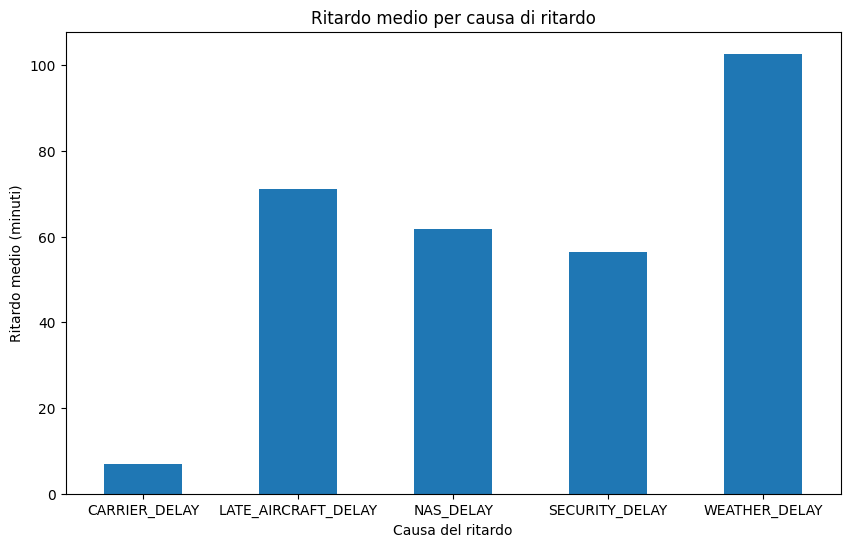

In [24]:
# Calculate mean for each group using the highest delay for each row
delay_means = df.groupby(df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].gt(0).idxmax(axis=1))['ARR_DELAY'].mean()

# Bar plot
delay_means.plot(kind='bar', figsize=(10, 6), title='Ritardo medio per causa di ritardo')
plt.xlabel('Causa del ritardo')
plt.ylabel('Ritardo medio (minuti)')
plt.xticks(rotation=0)
plt.show()

# **5. Delay by carriers**

**Number of flights arrived delayed by air carrier**

In [25]:
# Group by carrier and count delayed flights
voli_ritardo_per_carrier = voli_arrivati_in_ritardo.groupby('CODE_CARRIER').size().sort_values(ascending=False)

voli_ritardo_per_carrier

,0
CODE_CARRIER,
WN,103545
AA,83676
DL,67291
UA,51402
OO,47121
NK,21916
AS,21598
MQ,21120
B6,18600


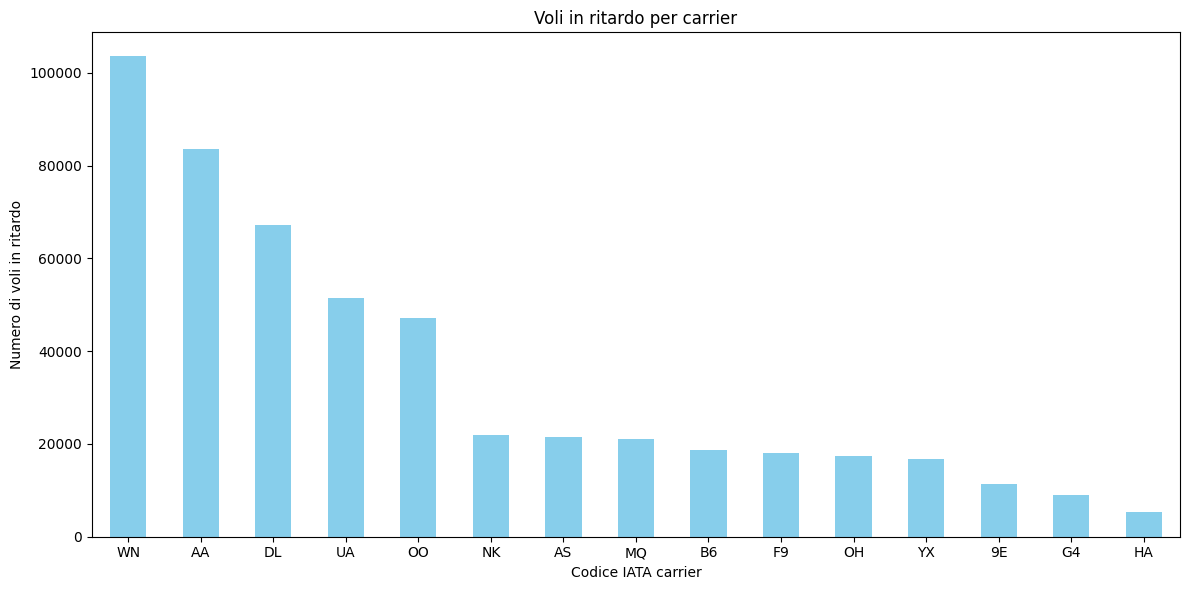

In [26]:
# Bar plot
plt.figure(figsize=(12, 6))
voli_ritardo_per_carrier.plot(kind='bar', color='skyblue')
plt.title('Voli in ritardo per carrier')
plt.xlabel('Codice IATA carrier')
plt.ylabel('Numero di voli in ritardo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Delayed flights rates per total flights**

In [27]:
# Calculate total flights per carrier
numero_voli_totali_per_carrier = df.groupby('CODE_CARRIER').size()

# Calculate delayed flights per carrier
percentuale_voli_in_ritardo = (voli_ritardo_per_carrier / numero_voli_totali_per_carrier * 100).sort_values(ascending=False)

percentuale_voli_in_ritardo


,0
CODE_CARRIER,
F9,48.971059
AA,48.022865
AS,45.807970
B6,45.722714
NK,44.323996
OH,42.697428
WN,42.095741
G4,41.821052
MQ,40.589626


In [28]:
df_combinati = pd.DataFrame({
    'Voli totali': numero_voli_totali_per_carrier,
    'Voli in ritardo': voli_ritardo_per_carrier,
    'Percentuale di voli in ritardo': percentuale_voli_in_ritardo
})

df_combinati=df_combinati.sort_values(by='Percentuale di voli in ritardo', ascending=False)

df_combinati

,Voli totali,Voli in ritardo,Percentuale di voli in ritardo
CODE_CARRIER,,,
F9,36834,18038,48.971059
AA,174242,83676,48.022865
AS,47149,21598,45.807970
B6,40680,18600,45.722714
NK,49445,21916,44.323996
OH,40787,17415,42.697428
WN,245975,103545,42.095741
G4,21537,9007,41.821052
MQ,52033,21120,40.589626


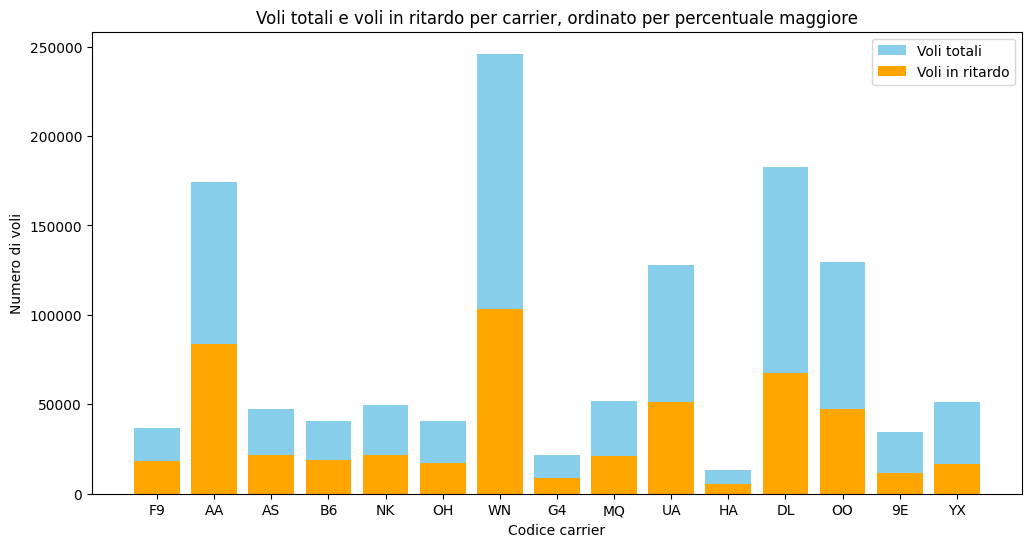

In [29]:
# Create stacked bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_combinati.index, df_combinati['Voli totali'], label='Voli totali', color='skyblue')
plt.bar(df_combinati.index, df_combinati['Voli in ritardo'], label='Voli in ritardo', color='orange')

# Add labels and title
plt.xlabel('Codice carrier')
plt.ylabel('Numero di voli')
plt.title('Voli totali e voli in ritardo per carrier, ordinato per percentuale maggiore')
plt.xticks(rotation=0)
plt.legend()
plt.show()

**Box plot of delays by carriers**

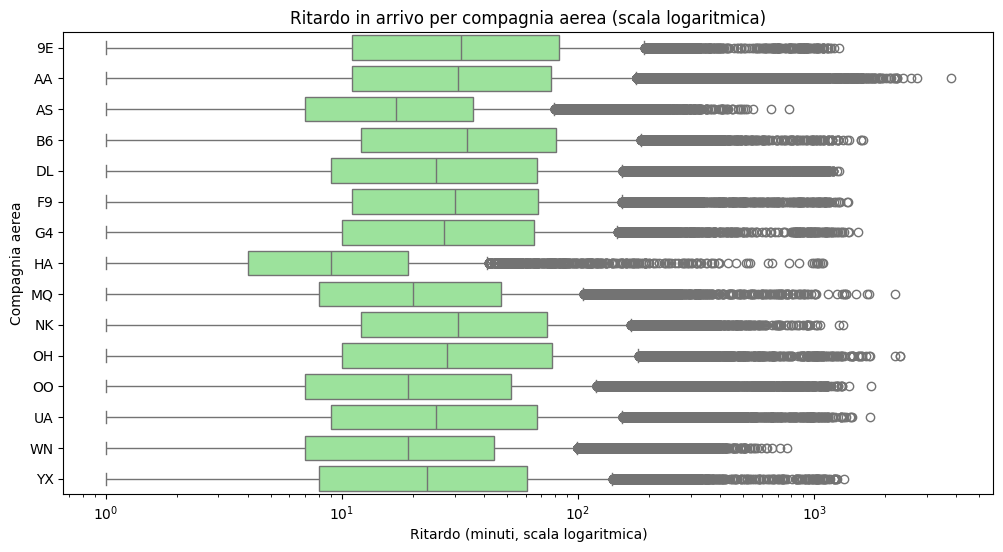

In [30]:
# Creation of box plots
plt.figure(figsize=(12, 6))
sns.boxplot(y='CODE_CARRIER', x='ARR_DELAY', data=voli_arrivati_in_ritardo,
            color='lightgreen', orient='h')
plt.xscale('log')
plt.title('Ritardo in arrivo per compagnia aerea (scala logaritmica)')
plt.ylabel('Compagnia aerea')
plt.xlabel('Ritardo (minuti, scala logaritmica)')
plt.show()



---


**Mean arriving delay time per carrier**




In [31]:
voli_arrivati_in_ritardo

,CODE_CARRIER,ID_CARRIER,TAIL_NUM,FLIGHT_NUMBER,ORIGIN_AIRPORT_ID,ORIGIN_IATA,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_IATA,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,PROGRAMMED_TOTAL_FLIGHT_TIME,ACTUAL_TOTAL_FLIGHT_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PROGRAMMED_DEPARTING_TIME_UTC,ACTUAL_DEPARTING_TIME_UTC,PROGRAMMED_ARRIVING_TIME_UTC,ACTUAL_ARRIVING_TIME_UTC
3,9E,20363,N131EV,5034.0,11433,DTW,"Detroit, MI",MI,Michigan,14122,PIT,"Pittsburgh, PA",PA,Pennsylvania,3.0,1.0,0.0,NaN,0.0,71.0,69.0,39.0,1.0,201.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 20:21:00+00:00,2024-07-01 20:24:00+00:00,2024-07-01 21:32:00+00:00,2024-07-01 21:33:00+00:00
16,9E,20363,N135EV,4837.0,12339,IND,"Indianapolis, IN",IN,Indiana,11433,DTW,"Detroit, MI",MI,Michigan,16.0,34.0,0.0,NaN,0.0,73.0,91.0,58.0,1.0,231.0,16.0,0.0,18.0,0.0,0.0,2024-07-01 21:59:00+00:00,2024-07-01 22:15:00+00:00,2024-07-01 23:12:00+00:00,2024-07-01 23:46:00+00:00
19,9E,20363,N136EV,4828.0,10990,CHO,"Charlottesville, VA",VA,Virginia,10397,ATL,"Atlanta, GA",GA,Georgia,4.0,2.0,0.0,NaN,0.0,108.0,106.0,68.0,1.0,457.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 22:27:00+00:00,2024-07-01 22:31:00+00:00,2024-07-02 00:15:00+00:00,2024-07-02 00:17:00+00:00
20,9E,20363,N136EV,4913.0,14685,SAV,"Savannah, GA",GA,Georgia,12953,LGA,"New York, NY",NY,New York,5.0,6.0,0.0,NaN,0.0,124.0,125.0,97.0,1.0,722.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 10:10:00+00:00,2024-07-01 10:15:00+00:00,2024-07-01 12:14:00+00:00,2024-07-01 12:20:00+00:00
21,9E,20363,N136EV,4956.0,12953,LGA,"New York, NY",NY,New York,14685,SAV,"Savannah, GA",GA,Georgia,7.0,12.0,0.0,NaN,0.0,145.0,150.0,105.0,1.0,722.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 12:59:00+00:00,2024-07-01 13:06:00+00:00,2024-07-01 15:24:00+00:00,2024-07-01 15:36:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247807,YX,20452,N863RW,3653.0,12264,IAD,"Washington, DC",VA,Virginia,14730,SDF,"Louisville, KY",KY,Kentucky,2.0,5.0,0.0,NaN,0.0,103.0,106.0,71.0,1.0,451.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 12:45:00+00:00,2024-08-31 12:47:00+00:00,2024-08-31 14:28:00+00:00,2024-08-31 14:33:00+00:00
1247809,YX,20452,N864RW,3431.0,11618,EWR,"Newark, NJ",NJ,New Jersey,11066,CMH,"Columbus, OH",OH,Ohio,-3.0,4.0,0.0,NaN,0.0,110.0,117.0,79.0,1.0,463.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 20:20:00+00:00,2024-08-31 20:17:00+00:00,2024-08-31 22:10:00+00:00,2024-08-31 22:14:00+00:00
1247816,YX,20452,N880RW,5664.0,12953,LGA,"New York, NY",NY,New York,11066,CMH,"Columbus, OH",OH,Ohio,-6.0,14.0,0.0,NaN,0.0,122.0,142.0,82.0,1.0,479.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 20:25:00+00:00,2024-08-31 20:19:00+00:00,2024-08-31 22:27:00+00:00,2024-08-31 22:41:00+00:00
1247822,YX,20452,N882RW,5781.0,10792,BUF,"Buffalo, NY",NY,New York,12478,JFK,"New York, NY",NY,New York,-9.0,2.0,0.0,NaN,0.0,107.0,118.0,61.0,1.0,301.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 23:43:00+00:00,2024-08-31 23:34:00+00:00,2024-09-01 01:30:00+00:00,2024-09-01 01:32:00+00:00


In [32]:
# Find mean per carrier
ritardo_in_arrivo = voli_arrivati_in_ritardo.groupby("CODE_CARRIER")["ARR_DELAY"].mean().sort_values(ascending=False)

# Find general mean
ritardo_medio = voli_arrivati_in_ritardo["ARR_DELAY"].mean()

ritardo_medio_series = pd.DataFrame({"ARR_DELAY": [ritardo_medio]}, index=["MEAN"])

ritardo_in_arrivo_medio = pd.concat([ritardo_in_arrivo, ritardo_medio_series])

In [33]:
# Sort by arr_delay
ritardo_in_arrivo_medio = ritardo_in_arrivo_medio.sort_values(by="ARR_DELAY", ascending=False)

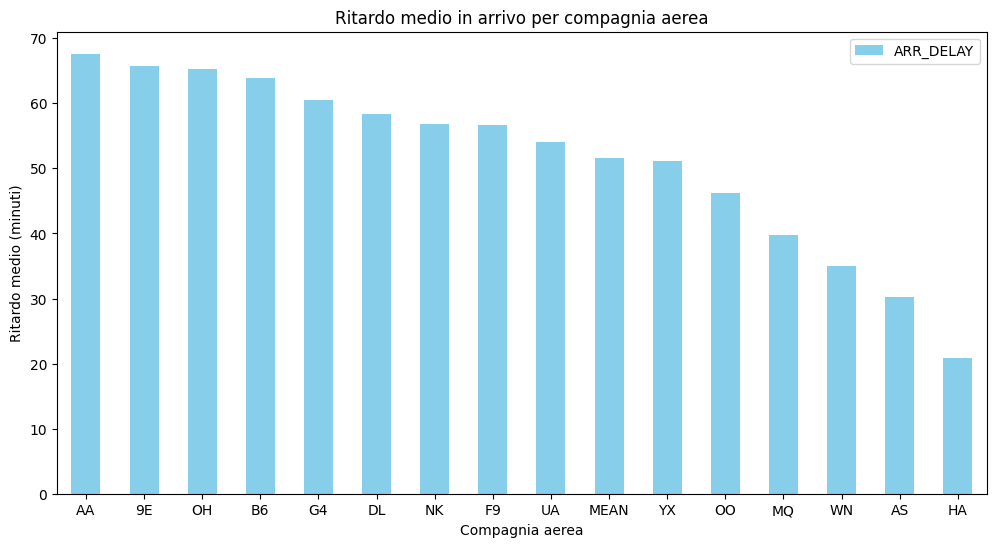

In [34]:
# Bar plot
ritardo_in_arrivo_medio.plot(kind="bar", color="skyblue", figsize=(12, 6))

plt.title("Ritardo medio in arrivo per compagnia aerea")
plt.xlabel("Compagnia aerea")
plt.ylabel("Ritardo medio (minuti)")
plt.xticks(rotation=0)
plt.show()

# **6. Delay by airports**

**Departure delay by origin airport**


In [35]:
# Total numbers of flight per airports
voli_totali_per_aeroporto_partenza = df.groupby('ORIGIN_IATA')["FLIGHTS"].count().sort_values(ascending=False).reset_index(name="TOTALE")

voli_totali_per_aeroporto_partenza

,ORIGIN_IATA,TOTALE
0,ATL,59427
1,DFW,56869
2,DEN,55323
3,ORD,49642
4,CLT,38130
...,...,...
337,PPG,27
338,ADK,18
339,SMX,17
340,SPI,12


In [36]:
# Number of delayed flights
voli_partiti_in_ritardo = df.loc[(df['DEP_DELAY'] > 0) & (df['DIVERTED'] == 0) & (df['CANCELLED'] == 0)].groupby("ORIGIN_IATA")["FLIGHTS"].count().sort_values(ascending=False).reset_index()

voli_partiti_in_ritardo

,ORIGIN_IATA,FLIGHTS
0,DFW,27612
1,DEN,26968
2,ATL,25163
3,ORD,23858
4,CLT,20645
...,...,...
337,PIH,7
338,BIH,6
339,SPI,6
340,EKO,5


In [37]:
# Merging 2 df
df_combinato_partenze = pd.merge(voli_totali_per_aeroporto_partenza, voli_partiti_in_ritardo, how="left")

df_combinato_partenze

,ORIGIN_IATA,TOTALE,FLIGHTS
0,ATL,59427,25163
1,DFW,56869,27612
2,DEN,55323,26968
3,ORD,49642,23858
4,CLT,38130,20645
...,...,...,...
337,PPG,27,16
338,ADK,18,11
339,SMX,17,9
340,SPI,12,6


In [38]:
# Delayesd rate
df_combinato_partenze['PERCENTUALE_RITARDI'] = (df_combinato_partenze['FLIGHTS'] / df_combinato_partenze['TOTALE']) * 100

df_combinato_partenze

,ORIGIN_IATA,TOTALE,FLIGHTS,PERCENTUALE_RITARDI
0,ATL,59427,25163,42.342706
1,DFW,56869,27612,48.553694
2,DEN,55323,26968,48.746453
3,ORD,49642,23858,48.060110
4,CLT,38130,20645,54.143719
...,...,...,...,...
337,PPG,27,16,59.259259
338,ADK,18,11,61.111111
339,SMX,17,9,52.941176
340,SPI,12,6,50.000000


<Axes: title={'center': 'PERCENTUALE_RITARDI'}, ylabel='Frequency'>

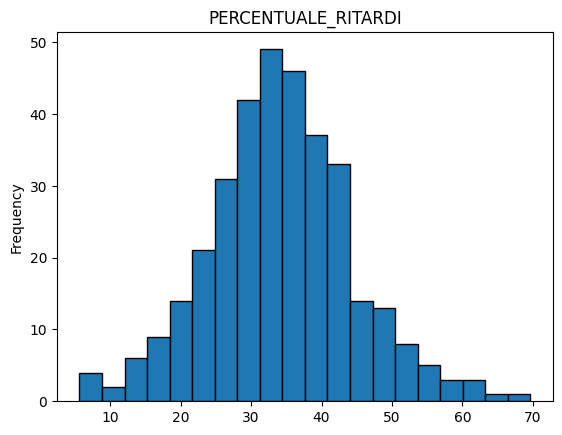

In [39]:
# Delay distribution histogram
df_combinato_partenze['PERCENTUALE_RITARDI'].plot(kind='hist', bins=20, title='PERCENTUALE_RITARDI', edgecolor="black")

In [40]:
# Find 10 busiest airports and sort by delayed percentage
top10_partenze_ritardo_aeroporti = df_combinato_partenze.nlargest(10, 'TOTALE').sort_values(by="PERCENTUALE_RITARDI", ascending=False)

top10_partenze_ritardo_aeroporti

,ORIGIN_IATA,TOTALE,FLIGHTS,PERCENTUALE_RITARDI
4,CLT,38130,20645,54.143719
6,LAS,32228,15925,49.413553
2,DEN,55323,26968,48.746453
1,DFW,56869,27612,48.553694
3,ORD,49642,23858,48.060110
7,SEA,32107,14848,46.245367
0,ATL,59427,25163,42.342706
8,PHX,31056,13029,41.953246
5,LAX,34570,12528,36.239514
9,LGA,28355,10129,35.722095


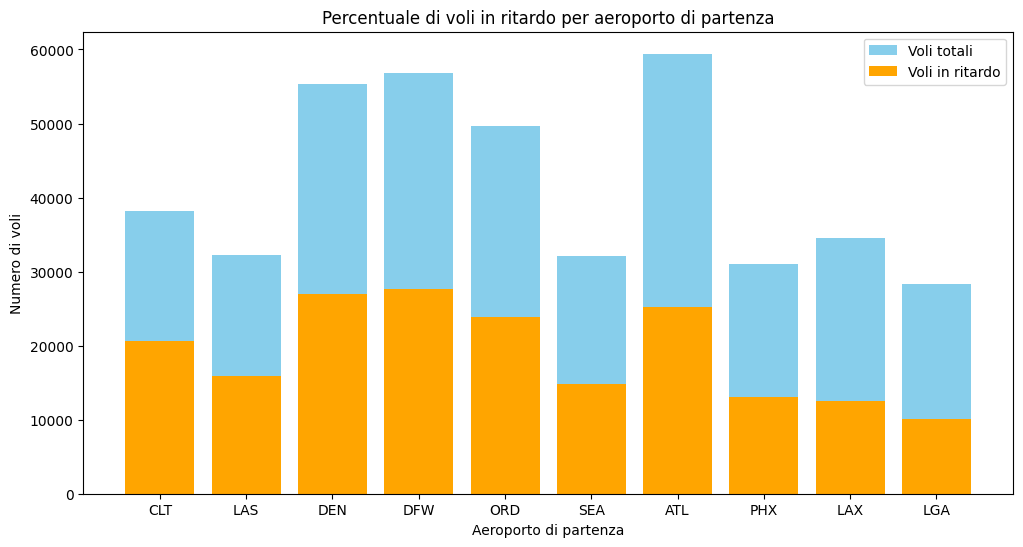

In [41]:
# Bar plot
plt.figure(figsize=(12, 6))

# First bar
plt.bar(top10_partenze_ritardo_aeroporti['ORIGIN_IATA'], top10_partenze_ritardo_aeroporti['TOTALE'], label='Voli totali', color='skyblue')

# Second bar
plt.bar(top10_partenze_ritardo_aeroporti['ORIGIN_IATA'], top10_partenze_ritardo_aeroporti['FLIGHTS'], label='Voli in ritardo', color='orange')

# Add labels and title
plt.title("Percentuale di voli in ritardo per aeroporto di partenza")
plt.xlabel("Aeroporto di partenza")
plt.ylabel("Numero di voli")
plt.legend()

# Show plot
plt.show()


### **7. Timeseries analysis**

In [42]:
# Extract hour of the day
df['HOUR_OF_DAY'] = df['PROGRAMMED_DEPARTING_TIME_UTC'].dt.hour

# Extract day of the week (0 = Monday, 6 = Sunday)
df['DAY_OF_WEEK'] = df['PROGRAMMED_DEPARTING_TIME_UTC'].dt.dayofweek

# Extract month
df['MONTH'] = df['PROGRAMMED_DEPARTING_TIME_UTC'].dt.month

# Extract day of the month
df['DAY_OF_MONTH'] = df['PROGRAMMED_DEPARTING_TIME_UTC'].dt.day

**Delay by hour of the day**

In [43]:
# Calculate average departure delay by hour of day
delay_by_hour = df.groupby('HOUR_OF_DAY')['DEP_DELAY'].mean()

delay_by_hour.sort_values(ascending=False)

,DEP_DELAY
HOUR_OF_DAY,
0,32.604801
23,30.610440
2,30.397132
1,29.864161
22,29.446634
21,26.960830
3,25.248765
20,23.379036
4,22.241725


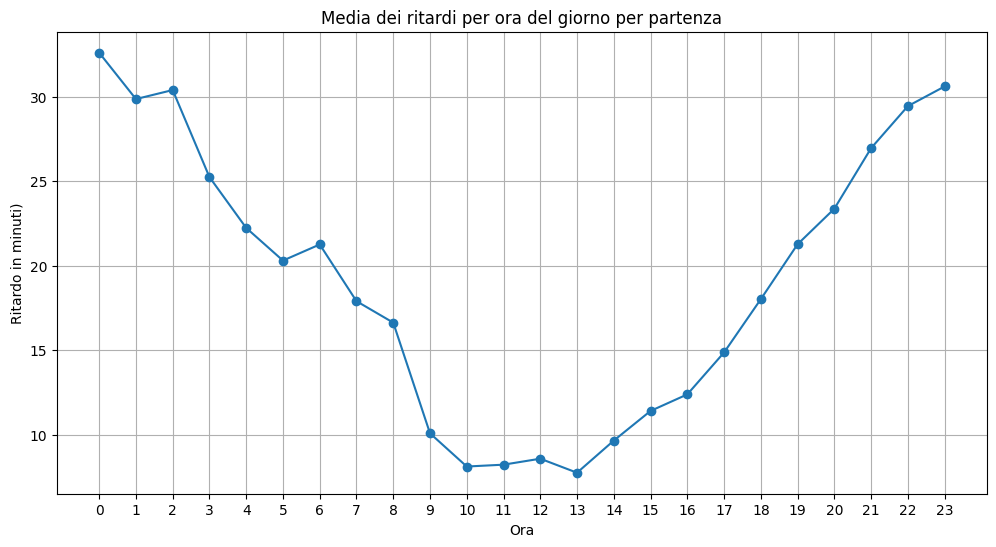

In [44]:
# Line PLot
plt.figure(figsize=(12, 6))

delay_by_hour.plot(kind='line', marker='o')
plt.title('Media dei ritardi per ora del giorno per partenza')
plt.xlabel('Ora')
plt.ylabel('Ritardo in minuti)')
plt.xticks(range(0, 24))

plt.grid(True)
plt.show()

**Delay by day of week**

In [45]:
# Calculate average departure delay by day of the week
delay_by_day = df.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean()

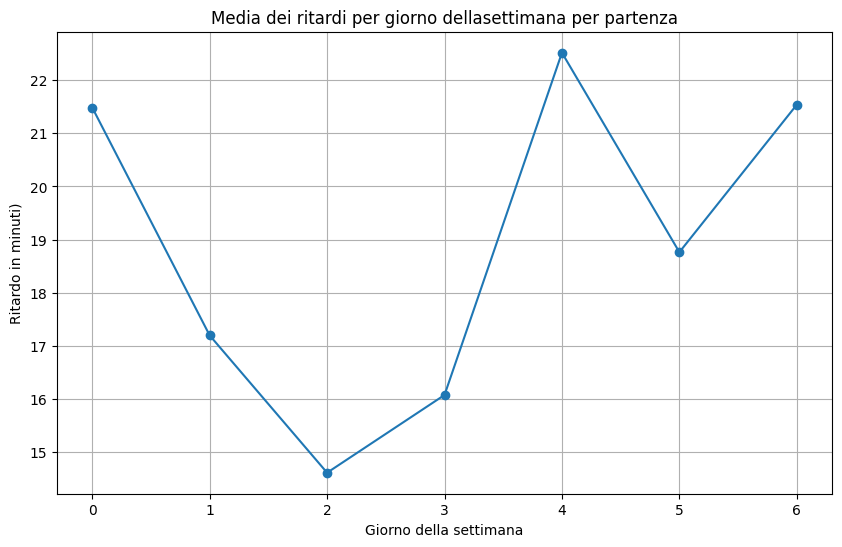

In [46]:
# Plot the results
plt.figure(figsize=(10, 6))
delay_by_day.plot(kind='line', marker='o')
plt.title('Media dei ritardi per giorno dellasettimana per partenza')
plt.xlabel('Giorno della settimana')
plt.ylabel('Ritardo in minuti)')
plt.grid(True)
plt.show()

**Delay by day of MONTH**

In [47]:
#Calculate average departure delay by day of the month
delay_by_day_of_month = df.groupby('DAY_OF_MONTH')['DEP_DELAY'].mean()

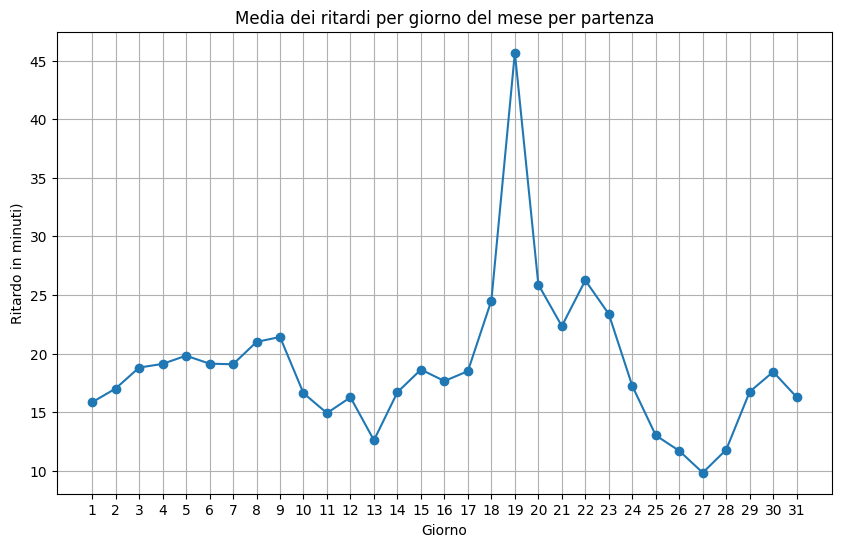

In [53]:
# Plot the results
plt.figure(figsize=(10, 6))
delay_by_day_of_month.plot(kind='line', marker='o')
plt.title('Media dei ritardi per giorno del mese per partenza')
plt.xlabel('Giorno')
plt.ylabel('Ritardo in minuti)')
plt.xticks(range(1, 32))

plt.grid(True)
plt.show()

**Resampling by day to get better insight of delay**

In [49]:
df_time = df[:]

In [50]:
# Resampling by day with mean of each day
df_day = df_time[["DEP_DELAY", "PROGRAMMED_DEPARTING_TIME_UTC"]].resample("D", on="PROGRAMMED_DEPARTING_TIME_UTC").mean()

In [51]:
df_day

,DEP_DELAY
PROGRAMMED_DEPARTING_TIME_UTC,
2024-06-30 00:00:00+00:00,0.000000
2024-07-01 00:00:00+00:00,13.812668
2024-07-02 00:00:00+00:00,10.938657
2024-07-03 00:00:00+00:00,8.249356
2024-07-04 00:00:00+00:00,5.416136
...,...
2024-08-28 00:00:00+00:00,5.874584
2024-08-29 00:00:00+00:00,13.313180
2024-08-30 00:00:00+00:00,19.833050


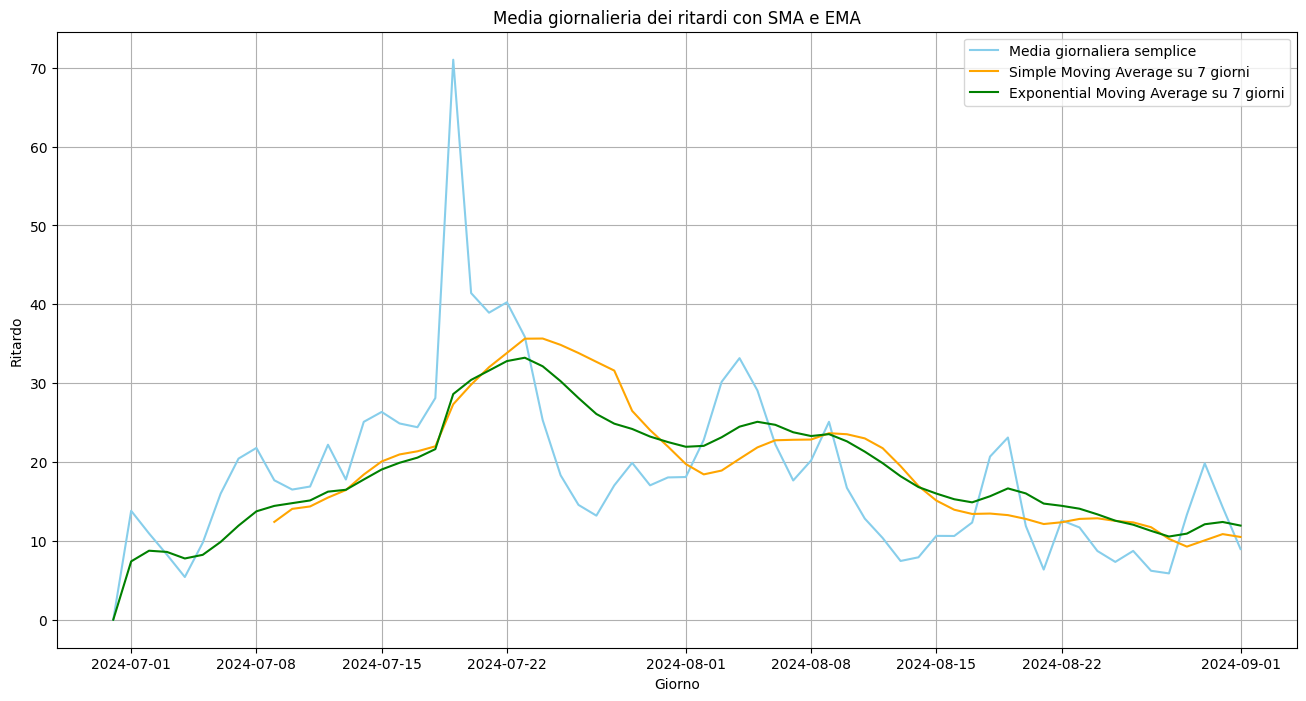

In [52]:
# Calculate the SMA mean of a group of 10 days. It helps identify the overall trend and responde more slowly to recent changes.
rolling_mean = df_day.rolling(window=10).mean()

# Calculate the EMA mean of a group of 14 days. It helps identify the overall trend and response more quickly to recent changes.
ema_mean = df_day.ewm(span=14).mean()

plt.figure(figsize=(16, 8))

plt.plot(df_day, label='Media giornaliera semplice', color='skyblue')
plt.plot(rolling_mean, label='Simple Moving Average su 7 giorni', color='orange')
plt.plot(ema_mean, label='Exponential Moving Average su 7 giorni', color='green')

plt.title('Media giornalieria dei ritardi con SMA e EMA')
plt.xlabel('Giorno')
plt.ylabel('Ritardo')

plt.legend()
plt.grid(True)

plt.show()